In [1]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx

import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed 
set_random_seed(2)

from keras import backend as K

from statsmodels.tsa.arima_model import ARIMA

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf 
from keras import metrics
from keras.callbacks import ModelCheckpoint

import pandas as pd
from pandas.plotting import autocorrelation_plot
import math as m
import os, glob

#Regresion Simple, Full connected y LSTM.

Using TensorFlow backend.


In [2]:

RANGE = 51

HYPER_L1_IN = RANGE
EPOCHS = 10
BATCH_SIZE = 32

TEST_SIZE = .19
VAL_SIZE = .0

START_IN = 50000
#total 99380

END_IN = 60000

TRAINING_TIME_ELAPSED = 0

TRAIN_MSE=0
TRAIN_RMSE=0
TRAIN_MAE=0
TEST_MSE=0
TEST_RMSE=0
TEST_MAE=0


In [7]:
#LOAD DATASET for ASK
# change column names
#load Dataset for BID
#change column names

cwd = os.getcwd()
source_data = os.path.join(cwd, r'../../Datasets/EURUSD/ene2004_nov2019/')
filenames = glob.glob(source_data + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DF_EURUSD_ASK_1D = pd.read_csv(filenames[0], parse_dates=['Gmt time'], date_parser=dateparse, index_col=0, header=0)
DF_EURUSD_ASK_1H = pd.read_csv(filenames[1], parse_dates=['Gmt time'], date_parser=dateparse, index_col=0, header=0)
DF_EURUSD_ASK_4H = pd.read_csv(filenames[2], parse_dates=['Gmt time'], date_parser=dateparse, index_col=0, header=0)
print(DF_EURUSD_ASK_1D.columns)
DF_EURUSD_ASK_1D.rename(columns={'Gmt time':'timestamp',
                             'Open':'open_ask',
                             'High':'high_ask',
                             'Low':'low_ask',
                             'Close':'close_ask',
                             'Volume':'volume_ask'},
                    inplace=True)
DF_EURUSD_ASK_4H.rename(columns={'Gmt time':'timestamp',
                             'Open':'open_ask',
                             'High':'high_ask',
                             'Low':'low_ask',
                             'Close':'close_ask',
                             'Volume':'volume_ask'},
                    inplace=True)
DF_EURUSD_ASK_1H.rename(columns={'Gmt time':'timestamp',
                             'Open':'open_ask',
                             'High':'high_ask',
                             'Low':'low_ask',
                             'Close':'close_ask',
                             'Volume':'volume_ask'},
                    inplace=True)
print(DF_EURUSD_ASK_1D.columns)

print(DF_EURUSD_ASK_1D.head())
print(DF_EURUSD_ASK_1D.tail())
DF_EURUSD_ASK = DF_EURUSD_ASK_1H


EURUSD_ASK_01.01.2004-19.11.2019.csv
EURUSD_ASK_1_D_01.01.2004-19.11.2019.csv
EURUSD_ASK_1_H_01.01.2004-19.11.2019.csv
EURUSD_ASK_4_h_31.12.2003-18.11.2019.csv
procesado.csv
procesado5.csv
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask'], dtype='object')
                     open_ask  high_ask  low_ask  close_ask  volume_ask
Gmt time                                                               
2004-01-01 00:00:00   1.25950   1.25960  1.25826    1.25910   6654.2002
2004-01-01 01:00:00   1.25958   1.25960  1.25947    1.25951    660.6000
2004-01-01 02:00:00   1.25955   1.25962  1.25944    1.25951   2091.0000
2004-01-01 03:00:00   1.25950   1.25965  1.25834    1.25869  10003.0996
2004-01-01 04:00:00   1.25908   1.25960  1.25843    1.25950   7603.3999
                     open_ask  high_ask  low_ask  close_ask  volume_ask
Gmt time                                                               
2019-11-29 

In [6]:
print(DF_EURUSD_ASK_1D.shape)
#DF_EURUSD_ASK2 = DF_EURUSD_ASK.iloc[3500:]
#DF_EURUSD_ASK2 = DF_EURUSD_ASK
print(DF_EURUSD_ASK_1D.shape)


(99430, 5)
(99430, 5)


In [8]:
#Describe Dataframe ASK

print('Shape: ', DF_EURUSD_ASK.shape)
print(DF_EURUSD_ASK.describe())
#print(DF_EURUSD_ASK.head())
#date_series = pd.to_datetime(DF_EURUSD_ASK['timestamp'][0])
DF_EURUSD_ASK = DF_EURUSD_ASK.drop(['timestamp'], axis = 1)
print(DF_EURUSD_ASK)


Shape:  (4971, 5)
          open_ask     high_ask      low_ask    close_ask    volume_ask
count  4971.000000  4971.000000  4971.000000  4971.000000  4.971000e+03
mean      1.269420     1.274296     1.264539     1.269411  4.241806e+05
std       0.121065     0.121796     0.120249     0.121061  4.474119e+05
min       1.039090     1.041820     1.034050     1.039090  5.400000e+01
25%       1.169065     1.173320     1.165560     1.168920  1.172481e+05
50%       1.275730     1.281390     1.270400     1.275550  2.226900e+05
75%       1.353105     1.357780     1.348335     1.353095  7.606080e+05
max       1.597400     1.604030     1.589800     1.597370  2.237468e+06


KeyError: "['timestamp'] not found in axis"

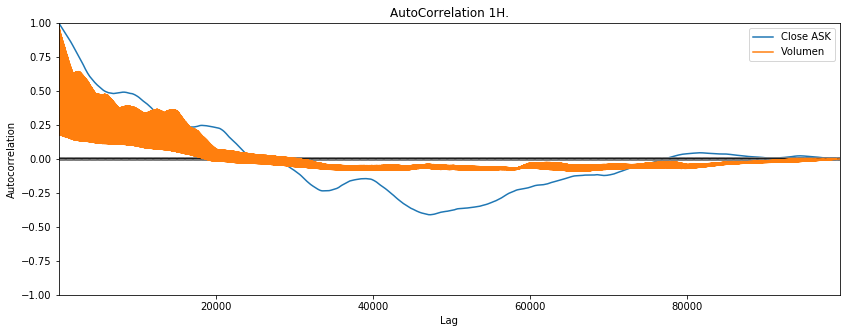

In [14]:
#Autocorrelation
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1H['close_ask'],label = 'Close ASK')
autocorrelation_plot(DF_EURUSD_ASK_1H['volume_ask'],label = 'Volumen')
plt.title('AutoCorrelation 1H.')
pyplot.show()

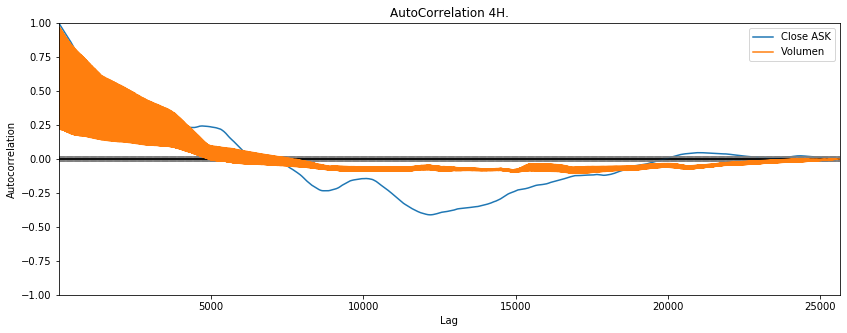

In [15]:
#Autocorrelation
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_4H['close_ask'],label = 'Close ASK')
autocorrelation_plot(DF_EURUSD_ASK_4H['volume_ask'],label = 'Volumen')
plt.title('AutoCorrelation 4H.')
pyplot.show()

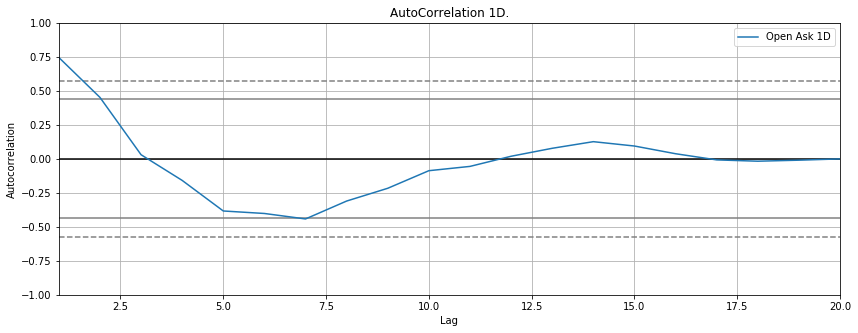

In [30]:
#Autocorrelation
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D[:20]['open_ask'],label = 'Open Ask 1D')
plt.title('AutoCorrelation 1D.')
pyplot.show()

In [ ]:
#Autocorrelation
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D['close_ask'],label = 'Close ASK')
autocorrelation_plot(DF_EURUSD_ASK_1D['volume_ask'],label = 'Volumen')
plt.title('AutoCorrelation 1D.')
pyplot.show()

In [10]:
def EMA(df, n):
    EMA = pd.Series(DF_EURUSD_ASK['close_ask'].ewm(com=0.5).mean(), name = 'EMA_' + str(n))
    df = df.join(EMA)  
    return df

In [11]:
DF_EURUSD_ASK = EMA(DF_EURUSD_ASK, 5)
DF_EURUSD_ASK = EMA(DF_EURUSD_ASK, 25)
DF_EURUSD_ASK = EMA(DF_EURUSD_ASK, 50)
print(DF_EURUSD_ASK.tail(5))

            open_ask  high_ask  low_ask  close_ask   volume_ask     EMA_5  \
Gmt time                                                                    
2019-11-14   1.10099   1.10277  1.09893    1.10200  118918.1328  1.101760   
2019-11-15   1.10200   1.10571  1.10147    1.10541  111245.0234  1.104193   
2019-11-17   1.10529   1.10549  1.10506    1.10542    3878.8799  1.105011   
2019-11-18   1.10541   1.10900  1.10536    1.10724  115104.9922  1.106497   
2019-11-19   1.10726   1.10841  1.10627    1.10782  105853.1172  1.107379   

              EMA_25    EMA_50  
Gmt time                        
2019-11-14  1.101760  1.101760  
2019-11-15  1.104193  1.104193  
2019-11-17  1.105011  1.105011  
2019-11-18  1.106497  1.106497  
2019-11-19  1.107379  1.107379  


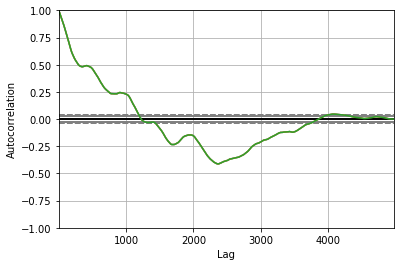

In [12]:
#Autocorrelation
autocorrelation_plot(DF_EURUSD_ASK['EMA_5'])
autocorrelation_plot(DF_EURUSD_ASK['EMA_25'])
autocorrelation_plot(DF_EURUSD_ASK['EMA_50'])
pyplot.show()

In [13]:
#Moving Average  
def MA(df, n): 
    MA = pd.Series(df['close_ask'].rolling(n).mean(), name = 'MA_' + str(n)) 
    df = df.join(MA)  
    return df


In [14]:
DF_EURUSD_ASK = MA(DF_EURUSD_ASK, 5)
DF_EURUSD_ASK = MA(DF_EURUSD_ASK, 25)
DF_EURUSD_ASK = MA(DF_EURUSD_ASK, 50)
print(DF_EURUSD_ASK.head(10))
print(DF_EURUSD_ASK.tail(10))

            open_ask  high_ask  low_ask  close_ask    volume_ask     EMA_5  \
Gmt time                                                                     
2004-01-01   1.25950   1.26052  1.24698    1.25733  4.621817e+05  1.257330   
2004-01-02   1.25717   1.26282  1.25214    1.25832  1.066578e+06  1.258072   
2004-01-04   1.25925   1.26487  1.25789    1.26318  6.879980e+04  1.261608   
2004-01-05   1.26324   1.26935  1.26301    1.26830  1.119689e+06  1.266125   
2004-01-06   1.26836   1.28093  1.26666    1.27150  1.125442e+06  1.269723   
2004-01-07   1.27161   1.27417  1.26180    1.26377  1.111343e+06  1.265749   
2004-01-08   1.26369   1.27854  1.25590    1.27696  1.115933e+06  1.273226   
2004-01-09   1.27698   1.28676  1.27034    1.28149  1.066698e+06  1.278736   
2004-01-11   1.28279   1.28572  1.28253    1.28477  7.567420e+04  1.282759   
2004-01-12   1.28498   1.28971  1.27327    1.27390  1.110720e+06  1.276853   

              EMA_25    EMA_50      MA_5  MA_25  MA_50  
Gmt ti

In [15]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['close_ask'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [16]:
DF_EURUSD_ASK = MOM(DF_EURUSD_ASK, 5)
DF_EURUSD_ASK = MOM(DF_EURUSD_ASK, 25)
DF_EURUSD_ASK = MOM(DF_EURUSD_ASK, 50)
print(DF_EURUSD_ASK.tail(5))

            open_ask  high_ask  low_ask  close_ask   volume_ask     EMA_5  \
Gmt time                                                                    
2019-11-14   1.10099   1.10277  1.09893    1.10200  118918.1328  1.101760   
2019-11-15   1.10200   1.10571  1.10147    1.10541  111245.0234  1.104193   
2019-11-17   1.10529   1.10549  1.10506    1.10542    3878.8799  1.105011   
2019-11-18   1.10541   1.10900  1.10536    1.10724  115104.9922  1.106497   
2019-11-19   1.10726   1.10841  1.10627    1.10782  105853.1172  1.107379   

              EMA_25    EMA_50      MA_5     MA_25     MA_50  Momentum_5  \
Gmt time                                                                   
2019-11-14  1.101760  1.101760  1.101982  1.109742  1.104368    -0.00013   
2019-11-15  1.104193  1.104193  1.102622  1.109458  1.104417     0.00320   
2019-11-17  1.105011  1.105011  1.103006  1.108986  1.104436     0.00192   
2019-11-18  1.106497  1.106497  1.104210  1.108651  1.104538     0.00602   
2019

In [17]:
#Rate of Change  
def ROC(df, n):  
    M = df['close_ask'].diff(n - 1)  
    N = df['close_ask'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)  
    return df

In [18]:
DF_EURUSD_ASK = ROC(DF_EURUSD_ASK, 5)
print(DF_EURUSD_ASK.tail(5))

            open_ask  high_ask  low_ask  close_ask   volume_ask     EMA_5  \
Gmt time                                                                    
2019-11-14   1.10099   1.10277  1.09893    1.10200  118918.1328  1.101760   
2019-11-15   1.10200   1.10571  1.10147    1.10541  111245.0234  1.104193   
2019-11-17   1.10529   1.10549  1.10506    1.10542    3878.8799  1.105011   
2019-11-18   1.10541   1.10900  1.10536    1.10724  115104.9922  1.106497   
2019-11-19   1.10726   1.10841  1.10627    1.10782  105853.1172  1.107379   

              EMA_25    EMA_50      MA_5     MA_25     MA_50  Momentum_5  \
Gmt time                                                                   
2019-11-14  1.101760  1.101760  1.101982  1.109742  1.104368    -0.00013   
2019-11-15  1.104193  1.104193  1.102622  1.109458  1.104417     0.00320   
2019-11-17  1.105011  1.105011  1.103006  1.108986  1.104436     0.00192   
2019-11-18  1.106497  1.106497  1.104210  1.108651  1.104538     0.00602   
2019

In [19]:
#Average True Range  
def ATR(df, n):  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'high_ask'), df.get_value(i, 'close_ask')) - min(df.get_value(i + 1, 'low_ask'), df.get_value(i, 'close_ask'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(df['close_ask'].ewm(com=n).mean(), name = 'ATR_' + str(n))  
    df = df.join(ATR)  
    return df

In [20]:
DF_EURUSD_ASK = ATR(DF_EURUSD_ASK, 1)
print(DF_EURUSD_ASK.tail(5))

TypeError: Cannot compare type 'Timestamp' with type 'int'

In [21]:
#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.Series(df['close_ask'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['close_ask'].rolling(n).std()))  
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['close_ask'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollingerb_' + str(n))  
    df = df.join(B2)  
    return df

In [22]:
DF_EURUSD_ASK = BBANDS(DF_EURUSD_ASK, 5)
print(DF_EURUSD_ASK.tail(5))

            open_ask  high_ask  low_ask  close_ask   volume_ask     EMA_5  \
Gmt time                                                                    
2019-11-14   1.10099   1.10277  1.09893    1.10200  118918.1328  1.101760   
2019-11-15   1.10200   1.10571  1.10147    1.10541  111245.0234  1.104193   
2019-11-17   1.10529   1.10549  1.10506    1.10542    3878.8799  1.105011   
2019-11-18   1.10541   1.10900  1.10536    1.10724  115104.9922  1.106497   
2019-11-19   1.10726   1.10841  1.10627    1.10782  105853.1172  1.107379   

              EMA_25    EMA_50      MA_5     MA_25     MA_50  Momentum_5  \
Gmt time                                                                   
2019-11-14  1.101760  1.101760  1.101982  1.109742  1.104368    -0.00013   
2019-11-15  1.104193  1.104193  1.102622  1.109458  1.104417     0.00320   
2019-11-17  1.105011  1.105011  1.103006  1.108986  1.104436     0.00192   
2019-11-18  1.106497  1.106497  1.104210  1.108651  1.104538     0.00602   
2019

In [23]:
#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['high_ask'] + df['low_ask'] + df['close_ask']) / 3)  
    R1 = pd.Series(2 * PP - df['low_ask'])  
    S1 = pd.Series(2 * PP - df['high_ask'])  
    R2 = pd.Series(PP + df['high_ask'] - df['low_ask'])  
    S2 = pd.Series(PP - df['high_ask'] + df['low_ask'])  
    R3 = pd.Series(df['high_ask'] + 2 * (PP - df['low_ask']))  
    S3 = pd.Series(df['low_ask'] - 2 * (df['high_ask'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

In [24]:
DF_EURUSD_ASK = PPSR(DF_EURUSD_ASK)
print(DF_EURUSD_ASK.tail(5))

            open_ask  high_ask  low_ask  close_ask   volume_ask     EMA_5  \
Gmt time                                                                    
2019-11-14   1.10099   1.10277  1.09893    1.10200  118918.1328  1.101760   
2019-11-15   1.10200   1.10571  1.10147    1.10541  111245.0234  1.104193   
2019-11-17   1.10529   1.10549  1.10506    1.10542    3878.8799  1.105011   
2019-11-18   1.10541   1.10900  1.10536    1.10724  115104.9922  1.106497   
2019-11-19   1.10726   1.10841  1.10627    1.10782  105853.1172  1.107379   

              EMA_25    EMA_50      MA_5     MA_25  ...     ROC_5  \
Gmt time                                            ...             
2019-11-14  1.101760  1.101760  1.101982  1.109742  ... -0.000191   
2019-11-15  1.104193  1.104193  1.102622  1.109458  ...  0.001731   
2019-11-17  1.105011  1.105011  1.103006  1.108986  ...  0.003814   
2019-11-18  1.106497  1.106497  1.104210  1.108651  ...  0.005686   
2019-11-19  1.107379  1.107379  1.105578  1.10

In [25]:
#HERE~~~~~~~~~~~~~~~~~~~~~


print(DF_EURUSD_ASK.shape)
DF_loc = DF_EURUSD_ASK.iloc[50:]
print(DF_loc)
print(DF_loc.shape)

(4971, 24)
            open_ask  high_ask  low_ask  close_ask    volume_ask     EMA_5  \
Gmt time                                                                     
2004-02-29   1.24893   1.25325  1.24738    1.25307  7.518830e+04  1.251580   
2004-03-01   1.25316   1.25413  1.24228    1.24441  1.122404e+06  1.246800   
2004-03-02   1.24448   1.24494  1.21944    1.21986  1.122737e+06  1.228840   
2004-03-03   1.21986   1.22170  1.20556    1.21884  1.129677e+06  1.222173   
2004-03-04   1.21893   1.22393  1.21350    1.21994  1.131900e+06  1.220684   
2004-03-05   1.21994   1.24285  1.21750    1.23657  1.072439e+06  1.231275   
2004-03-07   1.23851   1.23903  1.23562    1.23619  7.917700e+04  1.234552   
2004-03-08   1.23620   1.24250  1.23369    1.24192  1.122817e+06  1.239464   
2004-03-09   1.24198   1.24588  1.22729    1.23148  1.123340e+06  1.234141   
2004-03-10   1.23161   1.23296  1.21962    1.22281  1.120449e+06  1.226587   
2004-03-11   1.22272   1.23841  1.21627    1.23458  1

In [30]:
DF_Full = DF_loc
DF_Full.reset_index(drop=True, inplace=True) #reset indexes from iloc
print(DF_Full.shape)
print(DF_Full.columns)
print(DF_Full.head(10))

(4921, 24)
Index(['open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask', 'EMA_5',
       'EMA_25', 'EMA_50', 'MA_5', 'MA_25', 'MA_50', 'Momentum_5',
       'Momentum_25', 'Momentum_50', 'ROC_5', 'BollingerB_5', 'Bollingerb_5',
       'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3'],
      dtype='object')
   open_ask  high_ask  low_ask  close_ask    volume_ask     EMA_5    EMA_25  \
0   1.24893   1.25325  1.24738    1.25307  7.518830e+04  1.251580  1.251580   
1   1.25316   1.25413  1.24228    1.24441  1.122404e+06  1.246800  1.246800   
2   1.24448   1.24494  1.21944    1.21986  1.122737e+06  1.228840  1.228840   
3   1.21986   1.22170  1.20556    1.21884  1.129677e+06  1.222173  1.222173   
4   1.21893   1.22393  1.21350    1.21994  1.131900e+06  1.220684  1.220684   
5   1.21994   1.24285  1.21750    1.23657  1.072439e+06  1.231275  1.231275   
6   1.23851   1.23903  1.23562    1.23619  7.917700e+04  1.234552  1.234552   
7   1.23620   1.24250  1.23369    1.24192  1.122817e+06  1.239

In [27]:
total = DF_Full.shape[0]
print('Total: ', total)
print('Start: ', START_IN)
print('End: ', END_IN)


Total:  4921
Start:  50000
End:  60000


In [28]:
#Shape the first START of the total
DF_Full = DF_Full.iloc[START_IN:END_IN]
DF_Full.reset_index(drop=True, inplace=True) #reset indexes from iloc
print(DF_Full.shape)

(0, 24)


In [29]:
total = DF_Full.shape[0]
print('Total: ', total)

Total:  0


In [30]:
#generate the VECTOR Y
close_y = DF_Full['close_ask'].iloc[1:]
close_y.columns = ['close_y']
print(close_y.tail())
print(close_y.shape)
close_y = close_y.append(close_y.tail(1), ignore_index=True)
print(close_y.tail())
print(close_y.shape)


9995    1.32660
9996    1.32644
9997    1.32625
9998    1.32609
9999    1.32534
Name: close_ask, dtype: float64
(9999,)
9995    1.32644
9996    1.32625
9997    1.32609
9998    1.32534
9999    1.32534
Name: close_ask, dtype: float64
(10000,)


In [31]:
s1 = TEST_SIZE + VAL_SIZE
print('Sum of %s:',s1)
f1 = int(total * s1)
print('count of Val and Test:',f1)
end_train = total - f1
print('end of train: ', end_train)

count_val= int(total * VAL_SIZE)
print('count val: ',count_val)

count_test= int(total * TEST_SIZE)
print('count test: ',count_test)


end_val = end_train + count_val
print('end_val', end_val)



Sum of %s: 0.19
count of Val and Test: 1900
end of train:  8100
count val:  0
count test:  1900
end_val 8100


In [32]:
data_training = DF_Full.iloc[:end_train]
data_val = DF_Full.iloc[end_train: end_val]
data_test = DF_Full.iloc[end_val:]

print("Data Training Shape: ",data_training.shape)
print("Data Val Shape: ",data_val.shape)
print("Data Test Shape: ",data_test.shape)

data_training_y = close_y.iloc[:end_train]
data_val_y = close_y.iloc[end_train: end_val]
data_test_y = close_y.iloc[end_val:]
print("")
print("Y Data Training Shape: ", data_training_y.shape)
print("Y Data Val Shape: ", data_val_y.shape)
print("Y Data Test Shape: ", data_test_y.shape)

Data Training Shape:  (8100, 25)
Data Val Shape:  (0, 25)
Data Test Shape:  (1900, 25)

Y Data Training Shape:  (8100,)
Y Data Val Shape:  (0,)
Y Data Test Shape:  (1900,)


In [33]:
data_training_array = np.array(data_training)
#data_training_array = data_training_array.reset_index()
print(data_training_array.shape)
np.where(np.isnan(data_training_array))
#print(data_training_array.shape)
np.any(np.isnan(data_training_array))

(8100, 25)


False

In [34]:
# DATA SET SCALER TRAINING
scaler = MinMaxScaler(feature_range=(0, 1))
#print(data_training.head)
#data_training_array = np.array(data_training)
data_training_array_scaled = scaler.fit_transform(data_training_array)
print(data_training_array_scaled)
    

[[0.54154239 0.53992372 0.54335401 ... 0.54587715 0.50277804 0.56586662]
 [0.53892507 0.53556511 0.5432324  ... 0.5482522  0.49543271 0.57055742]
 [0.53789032 0.5480356  0.54353642 ... 0.54569445 0.524475   0.56533891]
 ...
 [0.68543429 0.68048913 0.68946856 ... 0.69542447 0.63077503 0.71294269]
 [0.68500822 0.68024699 0.68843488 ... 0.69465308 0.63250777 0.71245407]
 [0.68622558 0.68321327 0.69092789 ... 0.69599285 0.63403334 0.71262997]]


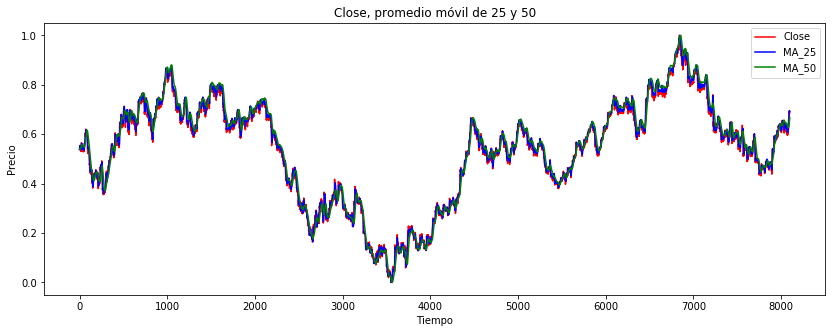

In [35]:
plt.figure(figsize=(14,5))
pyplot.plot(data_training_array_scaled[:,3], color = 'red', label = 'Close')
pyplot.plot(data_training_array_scaled[:,8], color = 'blue', label = 'MA_25')
pyplot.plot(data_training_array_scaled[:,9], color = 'green', label = 'MA_50')
plt.title('Close, promedio móvil de 25 y 50')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

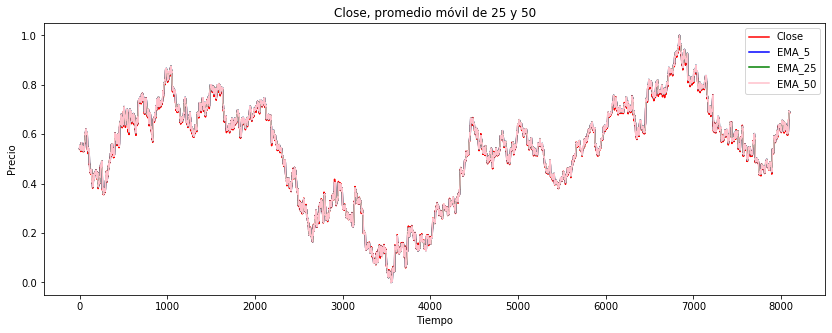

In [36]:
plt.figure(figsize=(14,5))
pyplot.plot(data_training_array_scaled[:,3], color = 'red', label = 'Close')
pyplot.plot(data_training_array_scaled[:,5], color = 'blue', label = 'EMA_5')
pyplot.plot(data_training_array_scaled[:,6], color = 'green', label = 'EMA_25')
pyplot.plot(data_training_array_scaled[:,7], color = 'pink', label = 'EMA_50')
plt.title('Close, promedio móvil de 25 y 50')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

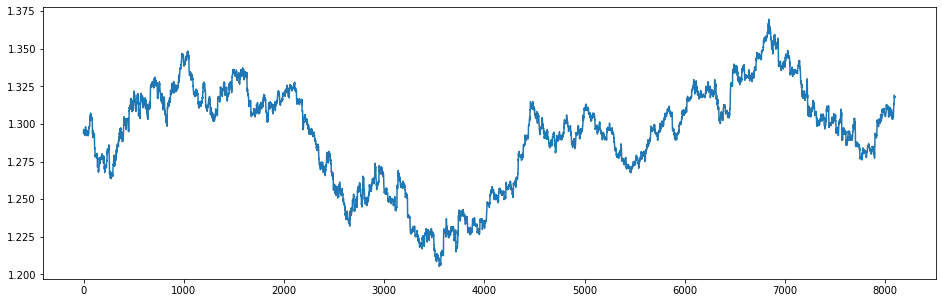

In [37]:
pyplot.figure(figsize=(16,5))
pyplot.plot(data_training_y)

In [38]:
X_train = []
y_train = []
for i in range(RANGE, data_training_array_scaled.shape[0]):
    X_train.append(data_training_array_scaled[i-RANGE:i])
    y_train.append(data_training_y[i])

X_train_np, y_train_np = np.array(X_train), np.array(y_train)

print(X_train_np.shape)
print(y_train_np.shape)

(8049, 51, 25)
(8049,)


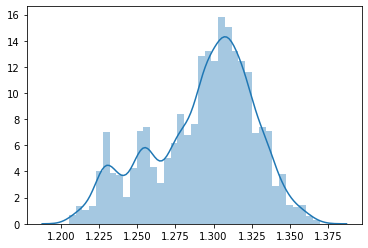

In [39]:
sns.distplot(y_train_np);



In [40]:

#Obtener los ultimos valores de Train para agregarlos a Val DF
# APPEND DE X
last_range_training_x = data_training.tail(RANGE)
print(last_range_training_x.shape)
print(data_val.shape)
data_val_x1 = last_range_training_x.append(data_val, ignore_index = True)
data_val_x1.shape
print(data_val_x1.head)

(51, 25)
(0, 25)
<bound method NDFrame.head of     open_ask  high_ask  low_ask  close_ask  volume_ask     EMA_5    EMA_25  \
0    1.31060   1.31060  1.30965    1.30970   4542.3198  1.310031  1.310031   
1    1.30971   1.31053  1.30933    1.31016   6093.7402  1.310117  1.310117   
2    1.31017   1.31080  1.30970    1.31044   5527.2202  1.310332  1.310332   
3    1.31044   1.31045  1.30722    1.30766  11074.8896  1.308551  1.308551   
4    1.30768   1.30801  1.30655    1.30775   8956.7900  1.308017  1.308017   
5    1.30775   1.30803  1.30701    1.30795   6308.7598  1.307972  1.307972   
6    1.30794   1.30826  1.30733    1.30734   5873.0400  1.307551  1.307551   
7    1.30733   1.30805  1.30652    1.30763  10327.3301  1.307604  1.307604   
8    1.30762   1.30925  1.30663    1.30745  15402.4297  1.307501  1.307501   
9    1.30747   1.30753  1.30530    1.30543  15774.9199  1.306120  1.306120   
10   1.30544   1.30763  1.30544    1.30640  14817.8301  1.306307  1.306307   
11   1.30638   1.

In [41]:
#Append de los datos de Train al DF de Val en Y
last_range_train_y = data_training_y.tail(RANGE)
print(last_range_train_y.shape)
print(data_val_y.shape)
data_val_y1 = last_range_train_y.append(data_val_y, ignore_index = True)
data_val_y1.shape
print(data_val_y1.head(10))

(51,)
(0,)
0    1.31016
1    1.31044
2    1.30766
3    1.30775
4    1.30795
5    1.30734
6    1.30763
7    1.30745
8    1.30543
9    1.30640
Name: close_ask, dtype: float64


In [42]:
data_val_x2 = scaler.transform(data_val_x1)
data_val_x2.shape
print(data_val_x2[:10])

[[0.64100067 0.633634   0.64088532 0.63552824 0.15471356 0.64097613
  0.64097613 0.64097613 0.6464139  0.64751357 0.65439214 0.58140162
  0.45110929 0.4917451  0.48502391 0.64415624 0.05665995 0.09386254
  0.63677494 0.62310315 0.64135493 0.61207487 0.64546709 0.58745645
  0.66359159]
 [0.63558342 0.63321024 0.63893956 0.63832765 0.20771764 0.64150524
  0.64150524 0.64150524 0.64624066 0.64712895 0.65485235 0.53153639
  0.44905505 0.50208301 0.47435113 0.64414553 0.05866635 0.33134498
  0.63691696 0.62529662 0.64206612 0.61367859 0.64408672 0.59094077
  0.66280979]
 [0.63838335 0.63484472 0.64118935 0.64003165 0.18836256 0.64282914
  0.64282914 0.64282914 0.64533733 0.64696847 0.65553478 0.51563342
  0.46713229 0.52815923 0.48581417 0.64500678 0.04572572 0.53466714
  0.6387835  0.62675228 0.64415906 0.61489116 0.64656327 0.59175064
  0.66540927]
 [0.64002678 0.63272595 0.62610969 0.62311344 0.37789797 0.63187708
  0.63187708 0.63187708 0.6411919  0.64600564 0.65589506 0.44501348
  0.40

In [43]:
X_val = []
y_val = []
for i in range(RANGE, data_val_x2.shape[0]):
    X_val.append(data_val_x2[i-RANGE:i])
    y_val.append(data_val_y1[i])

X_val_np = np.array(X_val)
y_val_np = np.array(y_val)
print(X_val_np.shape)
print(y_val_np.shape)

(0,)
(0,)


In [44]:

#Obtener los ultimos valores de Val para agregarlos a TEST DF
# Append en X
last_range_data_training_x = data_training.tail(RANGE)
print(last_range_data_training_x.shape)
print(data_test.shape)
data_test_x1 = last_range_data_training_x.append(data_test, ignore_index = True)
data_test_x1.shape


(51, 25)
(1900, 25)


(1951, 25)

In [45]:
#Append de los datos de Val al DF de Test de Y
last_range_training_y = data_training_y.tail(RANGE)
print(last_range_training_y.shape)
print(data_test_y.shape)
data_test_y1 = last_range_training_y.append(data_test_y, ignore_index = True)
data_test_y1.shape

(51,)
(1900,)


(1951,)

In [46]:
data_test_x2 = scaler.transform(data_test_x1)
data_test_x2.shape
print(data_test_x2[:10])

[[0.64100067 0.633634   0.64088532 0.63552824 0.15471356 0.64097613
  0.64097613 0.64097613 0.6464139  0.64751357 0.65439214 0.58140162
  0.45110929 0.4917451  0.48502391 0.64415624 0.05665995 0.09386254
  0.63677494 0.62310315 0.64135493 0.61207487 0.64546709 0.58745645
  0.66359159]
 [0.63558342 0.63321024 0.63893956 0.63832765 0.20771764 0.64150524
  0.64150524 0.64150524 0.64624066 0.64712895 0.65485235 0.53153639
  0.44905505 0.50208301 0.47435113 0.64414553 0.05866635 0.33134498
  0.63691696 0.62529662 0.64206612 0.61367859 0.64408672 0.59094077
  0.66280979]
 [0.63838335 0.63484472 0.64118935 0.64003165 0.18836256 0.64282914
  0.64282914 0.64282914 0.64533733 0.64696847 0.65553478 0.51563342
  0.46713229 0.52815923 0.48581417 0.64500678 0.04572572 0.53466714
  0.6387835  0.62675228 0.64415906 0.61489116 0.64656327 0.59175064
  0.66540927]
 [0.64002678 0.63272595 0.62610969 0.62311344 0.37789797 0.63187708
  0.63187708 0.63187708 0.6411919  0.64600564 0.65589506 0.44501348
  0.40

In [47]:
X_test = []
y_test = []
for i in range(RANGE, data_test_x2.shape[0]):
    X_test.append(data_test_x2[i-RANGE:i])
    y_test.append(data_test_y1[i])

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
print(X_test_np.shape)
print(y_test_np.shape)

(1900, 51, 25)
(1900,)


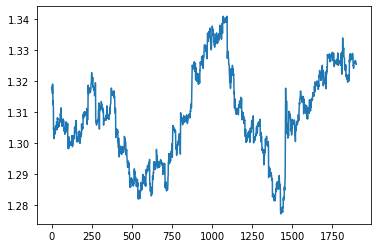

In [48]:
# Y del dataset de pruebas
pyplot.plot(y_test_np)

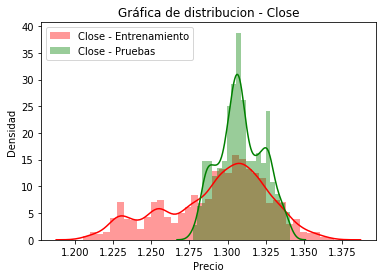

In [49]:
sns.distplot(y_train_np, color='red', label = 'Close - Entrenamiento');
sns.distplot(y_test_np, color='green', label = 'Close - Pruebas');
plt.title('Gráfica de distribucion - Close')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

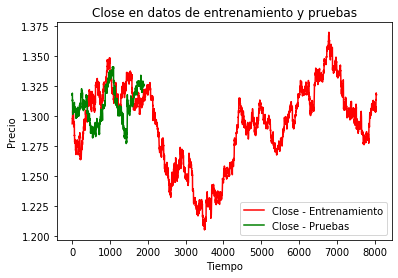

In [50]:

# Y de Val y Test comparados
pyplot.plot(y_train_np, color = 'red', label = 'Close - Entrenamiento')
#pyplot.plot(y_test_np)
pyplot.plot(y_test_np, color = 'green', label = 'Close - Pruebas')

plt.title('Close en datos de entrenamiento y pruebas')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [51]:
x_shape = X_train_np.shape[1]
print(x_shape)
y_shape = X_train_np.shape[2]
print(y_shape)

51
25


In [52]:
regressior = Sequential()

regressior.add(LSTM(units = RANGE, activation = 'relu', return_sequences = True, input_shape = (x_shape, y_shape)))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
#regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [53]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [54]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [55]:
regressior.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 51, 51)            15708     
_________________________________________________________________
lstm_1 (LSTM)                (None, 51, 60)            26880     
_________________________________________________________________
lstm_2 (LSTM)                (None, 51, 80)            45120     
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               96480     
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 184,309
Trainable params: 184,309
Non-trainable params: 0
_________________________________________________________________


In [56]:
#Model check pointer para almacenar el modelo cada epoca
checkpointer = ModelCheckpoint(filepath=source_data + '/model-{epoch:02d}.hdf5', verbose=1)

In [57]:
#history = regressior.fit(X_train_np, y_train_np, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpointer])
#history = regressior.fit(X_train_np, y_train_np, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_np, y_val_np))
#history = regressior.fit(X_train_np, y_train_np, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_np, y_val_np), callbacks=[checkpointer], shuffle=True)
#history = regressior.fit(X_train_np, y_train_np, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_np, y_val_np))
history = regressior.fit(X_train_np, y_train_np, epochs=EPOCHS, batch_size=BATCH_SIZE)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8049 samples
Epoch 1/10
8049/8049 [==============================] - 65s 8ms/sample - loss: 2.5062 - mean_squared_error: 2.5062 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 20.5085 - cosine_proximity: 0.9920
Epoch 2/10
8049/8049 [==============================] - 48s 6ms/sample - loss: 8.6056e-05 - mean_squared_error: 8.6056e-05 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 0.5736 - cosine_proximity: 1.0000
Epoch 3/10
8049/8049 [==============================] - 47s 6ms/sample - loss: 5.3575e-05 - mean_squared_error: 5.3575e-05 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 0.4462 - cosine_proximity: 1.0000
Epoch 4/10
8049/8049 [==============================] - 48s 6ms/sample - loss: 4.5061e-05 - mean_squared_error: 4.5061e-05 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 0.4135 - cosine_proximity: 1.0000
Epoch 5

In [58]:
MODEL_NAME = "03_marzo_model_24Features.hdf5"

regressior.save( source_data + MODEL_NAME)


In [59]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])


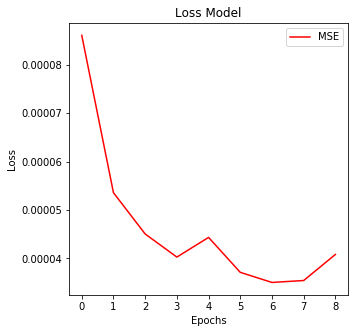

In [60]:
#PLOT MSE MAE
plt.figure(figsize=(5,5))
#plt.plot(history.history['val_loss'][1:], color = 'blue', label = 'Val_Loss')
plt.plot(history.history['mean_squared_error'][1:], color = 'red', label = 'MSE')
#plt.plot(history.history['mean_absolute_error'][1:], color = 'blue', label = 'MAE')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

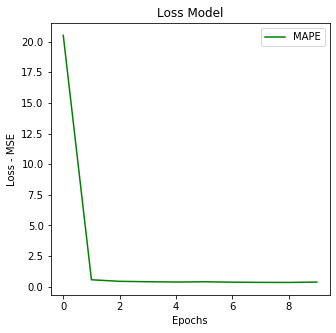

In [61]:
#PLOT MSE MAE
plt.figure(figsize=(5,5))
plt.plot(history.history['mean_absolute_percentage_error'][0:], color = 'green', label = 'MAPE')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss - MSE')
plt.legend()
plt.show()


In [62]:
#Load Model
#filepath = os.path.join(source_data, r'final_model_100Epochs_3Dic.hdf5')
filepath = os.path.join(source_data, MODEL_NAME)
print(filepath)
model = tf.keras.models.load_model(filepath)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/../../Datasets/EURUSD/ene2004_nov2019/03_marzo_model_24Features.hdf5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [63]:
y_test_pred = model.predict(X_test_np)
y_test_pred.shape

(1900, 1)

In [64]:
y_train_pred = model.predict(X_train_np)
y_train_pred.shape

(8049, 1)

(1900,)
(1900, 1)


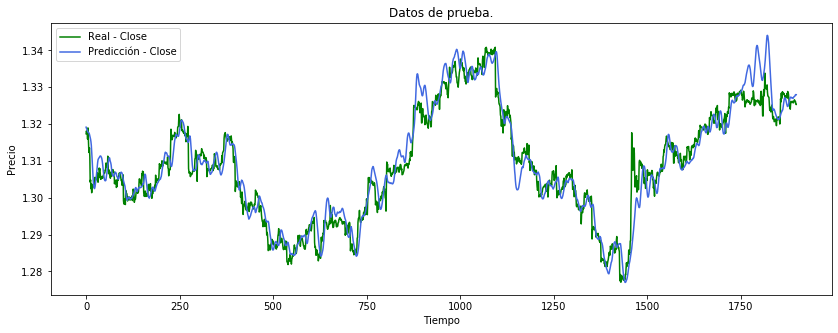

In [65]:
print(y_test_np.shape)
print(y_test_pred.shape)
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test_np[:], color = 'green', label = 'Real - Close')
plt.plot(y_test_pred[:], color = 'royalblue', label = 'Predicción - Close')
plt.title('Datos de prueba.')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
print('Test MAE:', mean_absolute_error(y_test_np, y_test_pred))#Mean Absolute Error
print('Test RMSE:',np.sqrt(mean_squared_error(y_test_np, y_test_pred)))#Root Mean Squared Error
print('Test MSE:',mean_squared_error(y_test_np, y_test_pred))#Mean Squared Error
print('Test MAPE:',mean_absolute_percentage_error(y_test_np, y_test_pred))#Mean Absolute Percentaje Error
print('Test R2:',r2_score(y_test_np, y_test_pred))#R2 Score


Test MAE: 0.0030538201579244496
Test RMSE: 0.004216986560213828
Test MSE: 1.7782975649024058e-05
Test MAPE: 1.2899097799107582
Test R2: 0.9149843173658393


(1899,)
(1899, 1)


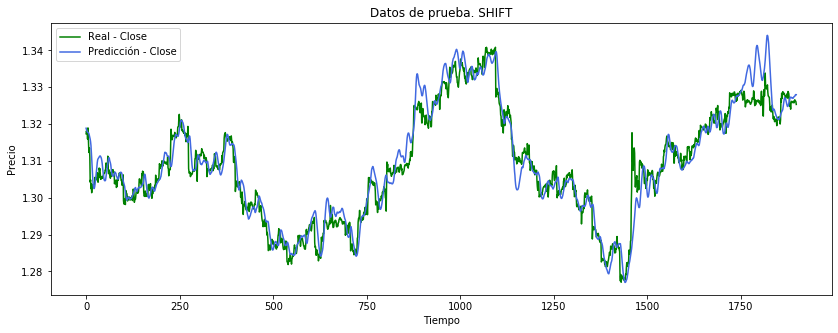

In [68]:
#shift 
y_test_np2 = np.delete(y_test_np, -1)


print(y_test_np2.shape)
print(y_test_pred[1:].shape)
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test_np2, color = 'green', label = 'Real - Close')
plt.plot(y_test_pred[1:], color = 'royalblue', label = 'Predicción - Close')
plt.title('Datos de prueba. SHIFT')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [69]:
#SHIFT
print('SHIFT Test MAE:', mean_absolute_error(y_test_np2, y_test_pred[1:]))#Mean Absolute Error
print('SHIFT Test RMSE:',np.sqrt(mean_squared_error(y_test_np2, y_test_pred[1:])))#Root Mean Squared Error
print('SHIFT Test MSE:',mean_squared_error(y_test_np2, y_test_pred[1:]))#Mean Squared Error
print('SHIFT Test MAPE:',mean_absolute_percentage_error(y_test_np2, y_test_pred[1:]))#Mean Absolute Percentaje Error
print('SHIFT Test R2:',r2_score(y_test_np2, y_test_pred[1:]))#R2 Score


SHIFT Test MAE: 0.002893921827765248
SHIFT Test RMSE: 0.00403510878207446
SHIFT Test MSE: 1.6282102883174427e-05
SHIFT Test MAPE: 1.2899133011994313
SHIFT Test R2: 0.9221463120970645


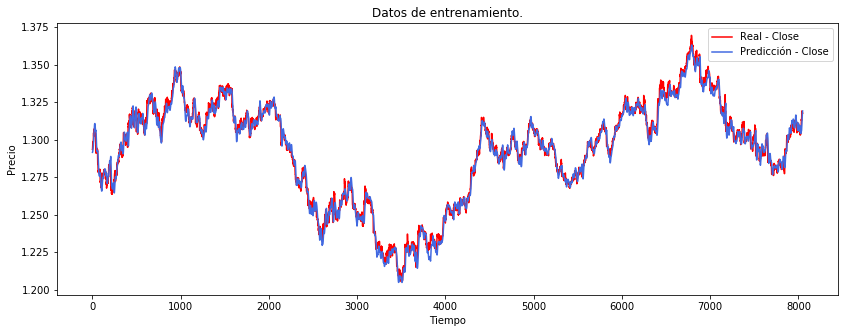

In [70]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train_np, color = 'red', label = 'Real - Close')
plt.plot(y_train_pred, color = 'royalblue', label = 'Predicción - Close')
plt.title('Datos de entrenamiento.')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [71]:
print('Train MAE:', mean_absolute_error(y_train_np, y_train_pred))#Mean Absolute Error
print('Train RMSE:',np.sqrt(mean_squared_error(y_train_np, y_train_pred)))#Root Mean Squared Error
print('Train MSE:',mean_squared_error(y_train_np, y_train_pred))#Mean Squared Error
#print('Test MAPE:',mean_absolute_percentage_error(y_train_np, y_train_pred))#Mean Absolute Percentaje Error
print('Test R2:',r2_score(y_train_np, y_train_pred))#R2 Score
y_train_np2 = np.delete(y_train_np, -1)
print('Test R2 (-1):',r2_score(y_train_np2, y_train_pred[1:]))#R2 Score

Train MAE: 0.003043208069656189
Train RMSE: 0.004024262746297128
Train MSE: 1.6194690651234904e-05
Test R2: 0.9854059389537705
Test R2 (-1): 0.9871836395891759


In [237]:
# Section to implement the ARIMA model from the library statsmodels.tsa.arima_model
# fit model
#model = ARIMA(series, order=(5,1,0))
train, test = y_train_np, y_test_np
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


/Users/marami3/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/marami3/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/marami3/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/marami3/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/marami3/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimizat

Test MSE: 0.000


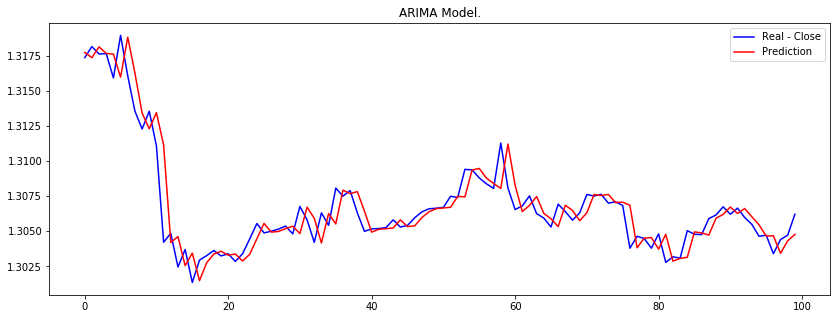

In [238]:
# plot
plt.figure(figsize=(14,5))
pyplot.plot(test[0:100], color='blue',label = 'Real - Close')
pyplot.plot(predictions[0:100], color='red',label = 'Prediction')
plt.title('ARIMA Model.')
plt.legend()
pyplot.show()

In [239]:
print('Train MAE:', mean_absolute_error(test, predictions))#Mean Absolute Error
print('Train RMSE:',np.sqrt(mean_squared_error(test, predictions)))#Root Mean Squared Error
print('Train MSE:',mean_squared_error(test, predictions))#Mean Squared Error

Train MAE: 0.0009024658862042764
Train RMSE: 0.0014721935197721378
Train MSE: 2.1673537596590758e-06
